# Prepare Module

In [2]:
import pandas as pd                 # Load Dataset
import seaborn as sns               # Visualisasi
import numpy as np                  # perhitungan matematika
import matplotlib.pyplot as plt     # Visualisasi
import plotly.express as px         # Visualisasi
import warnings
warnings.filterwarnings('ignore')

print("Module Ready")

Module Ready


Load Dataset

In [3]:
df = pd.read_csv('Jurusan_Klasifikasi_SMA_SMK.csv')
df.head(5)

,MTK,FIS,KIM,BIO,PRODI
0,74,75,72,74,IK
1,75,72,68,73,IK
2,81,86,80,85,SI
3,75,79,82,82,SI
4,75,73,78,76,IK


Show Data information

In [4]:
kolom_baris     = df.shape        # Mengecek Jumlah Baris dan Kolom
nama_kolom      = df.columns      # Menngcek Nama-Nama Kolom
type_dataset    = df.dtypes       # Mengecek Type Data apa saja yang digunakan
info_dataset    = df.info()       # Mengecek Missing Value Pada Dataset
summary_dataset = df.describe()   # Mengecek Summary pada dataset (mean,Median,std etc)

print("\n\nInfor Dataset        : ",info_dataset,
      "\n\nJumlah Baris x Kolom : ",kolom_baris, 
      "\n\nNama-nama Kolom      : ",nama_kolom,
      "\n\nType Dataset         : ",type_dataset,
      "\n\nSummary Dataset      : ",summary_dataset)
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MTK     160 non-null    int64 
 1   FIS     160 non-null    int64 
 2   KIM     160 non-null    int64 
 3   BIO     160 non-null    int64 
 4   PRODI   160 non-null    object
dtypes: int64(4), object(1)
memory usage: 6.4+ KB


Infor Dataset        :  None 

Jumlah Baris x Kolom :  (160, 5) 

Nama-nama Kolom      :  Index(['MTK', 'FIS', 'KIM', 'BIO', 'PRODI'], dtype='object') 

Type Dataset         :  MTK       int64
FIS       int64
KIM       int64
BIO       int64
PRODI    object
dtype: object 

Summary Dataset      :                MTK         FIS         KIM         BIO
count  160.000000  160.000000  160.000000  160.000000
mean    75.893750   78.312500   75.700000   77.200000
std      3.274827    4.301802    4.117458    3.075159
min     70.000000   72.000000   68.000000   73.000000
25%     74.000000   75.00

In [5]:
print("Summary Dataset :",summary_dataset)

Summary Dataset :               MTK         FIS         KIM         BIO
count  160.000000  160.000000  160.000000  160.000000
mean    75.893750   78.312500   75.700000   77.200000
std      3.274827    4.301802    4.117458    3.075159
min     70.000000   72.000000   68.000000   73.000000
25%     74.000000   75.000000   72.000000   75.000000
50%     75.000000   79.000000   75.000000   76.000000
75%     78.000000   82.000000   80.000000   80.000000
max     82.000000   86.000000   82.000000   85.000000


In [6]:
df = df.drop_duplicates()     # Menghapus dataset yang double

In [7]:
cek_mising_value = df.isnull().sum()    # mengecek data yang kosong
print("Menampilkan Data Kosong :\n\n",cek_mising_value)

Menampilkan Data Kosong :

 MTK      0
FIS      0
KIM      0
BIO      0
PRODI    0
dtype: int64


# Visualisasi Dataset

<AxesSubplot:xlabel='PRODI', ylabel='count'>

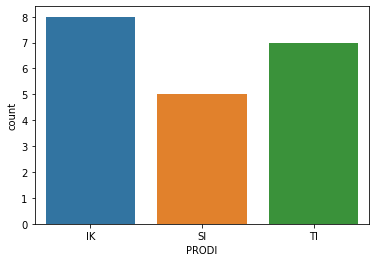

In [9]:
# Visualisasi with seaborn
sns.countplot('PRODI',data=df)


In [8]:
# visualisasi with plotly
px.histogram(df, x="PRODI", color = 'PRODI', width=800, height=400)

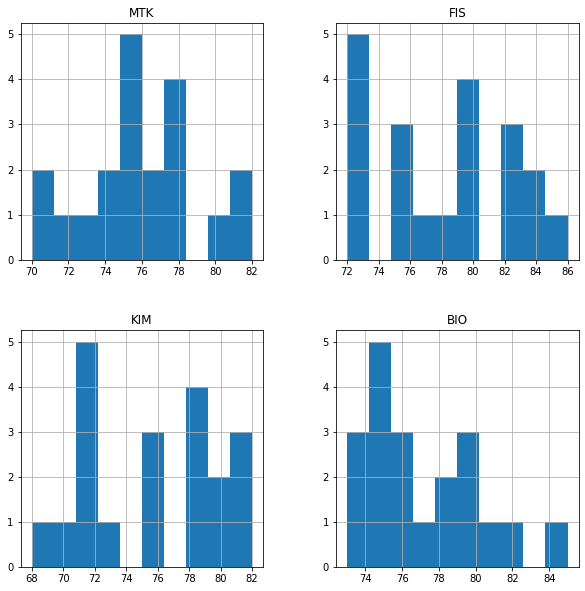

In [9]:
# Visualisasi Histogram semua kriteria dataset dengan matplotlib
df.hist(bins = 10, figsize = (10, 10))

plt.show()

* Melihat Korelasi dataset


<AxesSubplot:>

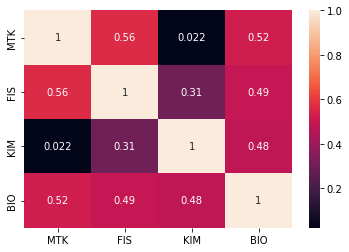

In [10]:
korelasi = df.corr()
sns.heatmap(korelasi, annot = True)

In [11]:
df.columns

Index(['MTK', 'FIS', 'KIM', 'BIO', 'PRODI'], dtype='object')

* Melihat Persebaran Data

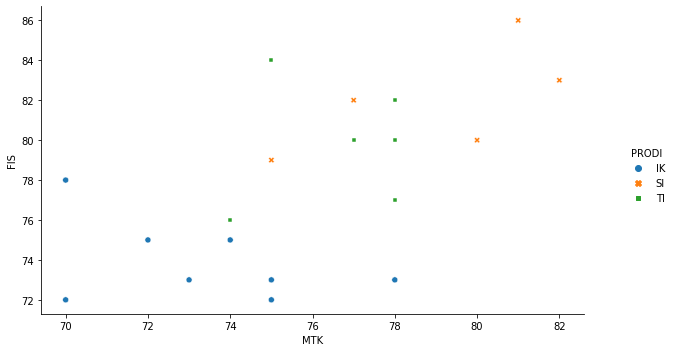

In [12]:
g=sns.relplot(x='MTK',y='FIS',data=df,hue='PRODI',style='PRODI')
g.fig.set_size_inches(10,5)
plt.show()

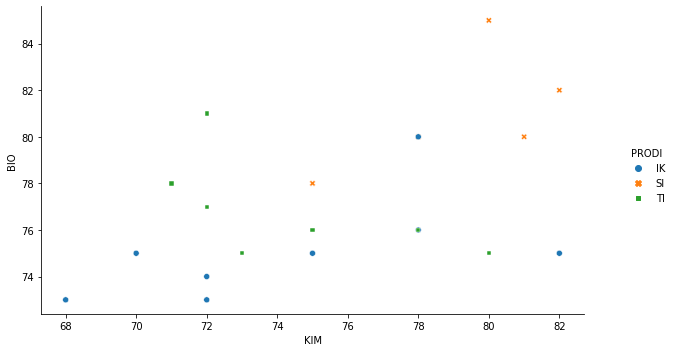

In [13]:
g=sns.relplot(x='KIM',y='BIO',data=df,hue='PRODI',style='PRODI')
g.fig.set_size_inches(10,5)
plt.show()

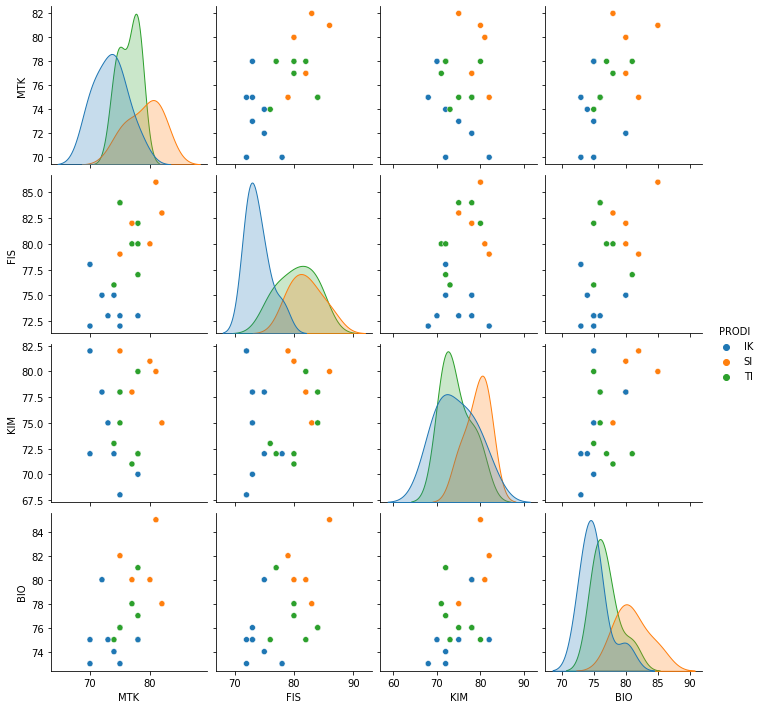

In [14]:
sns.pairplot(df,hue="PRODI")
plt.show()

# SPLITING DATASET

In [15]:
X = df.drop(['PRODI'],axis=1)
y = df['PRODI']


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
y

array([0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0])

In [18]:
from sklearn.model_selection import train_test_split          # Module Spliting Dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
# Melihat Hasil Spliting Dataset
print(f"Jumlah X Train : ",X_train.shape,
      "\nJumlah y Train : ",y_train.shape,
      "\nJumlah X Test : ",X_test.shape,
      "\nJumlah y test : ",y_test.shape,
      "\n\nTotal Data :\n",df.count())

Jumlah X Train :  (16, 4) 
Jumlah y Train :  (16,) 
Jumlah X Test :  (4, 4) 
Jumlah y test :  (4,) 

Total Data :
 MTK      20
FIS      20
KIM      20
BIO      20
PRODI    20
dtype: int64


# MEMBANGUN MODEL MACHINE LEARNING

In [20]:
from sklearn.neighbors import KNeighborsClassifier                    # digunakan untuk metode KNN
from sklearn.model_selection import RepeatedStratifiedKFold           # digunakan untuk nilai k
from sklearn.metrics import classification_report,confusion_matrix    # digunakan untuk menhitung akurasi
from sklearn.metrics import f1_score, precision_score, recall_score   # digunakan untuk menghitung akurasu
from sklearn.model_selection import GridSearchCV                      # kombinasi yang berbeda dari semua hyperparameter         

print("Library KNN Siap")

Library KNN Siap


* Membuat Model yang di tentukan oleh machine learning

In [21]:
# List Parameter
knn = KNeighborsClassifier()
n_neighbors = list(range(12,25))
p = [1,2]
weights = ['uniform','distance']
metric = ['euclidean','manhattan','minkowski']

# Deklarasikan Syarat KNN
hyperparameters = dict(n_neighbors = n_neighbors, p = p,weights = weights, metric = metric)

# Membuat Model

cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3, random_state = 1)
grid_search = GridSearchCV(estimator = knn, param_grid = hyperparameters, n_jobs = -1, cv = cv, scoring = 'f1', error_score = 0)


In [22]:
best_model_knn = grid_search.fit(X_train,y_train)

In [23]:
best_model_knn

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')

In [24]:
print("Best Leaf Size : ", best_model_knn.best_estimator_.get_params()['leaf_size'])
print("Best p : ", best_model_knn.best_estimator_.get_params()['p'])
print("Best n_neighbors : ", best_model_knn.best_estimator_.get_params()['n_neighbors'])

Best Leaf Size :  30
Best p :  1
Best n_neighbors :  12


In [25]:
# Prediksi menggunakan Model yang sudah dibangun
knn_pred = best_model_knn.predict(X_test)

In [26]:
df.columns

Index(['MTK', 'FIS', 'KIM', 'BIO', 'PRODI'], dtype='object')

In [27]:
df.head(1)

,MTK,FIS,KIM,BIO,PRODI
0,74,75,72,74,IK


# Evaluasi Model

In [28]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

Confusion matrix for KNN
 [[2 1]
 [0 1]]
accuracy_KNN : 0.750
precision_KNN : 0.750
recall_KNN: 0.750
f1-score_KNN : 0.750


<AxesSubplot:>

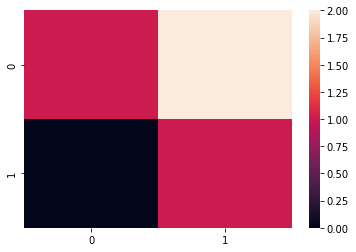

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [30]:
# Visualisasi Confusion Matrix
import plotly.express as px
fig = px.imshow(confusion_matrix(y_test,knn_pred), width = 500, height = 400)
fig.show()

In [31]:
# Mencetak Akurasi
akurasi = accuracy * 100

print("Akurasi yang didapat : ", akurasi, "%")

Akurasi yang didapat :  75.0 %


# Meprediksi Inputan User

In [32]:
user = ([[74,	75,	72,	74]])

In [33]:
knn_pred = best_model_knn.predict(user)
knn_pred

array([2])

In [34]:
if knn_pred == ([0]):
    print("Jurusan Yang Tepat Adalah Ilmu Komputer")
elif knn_pred == ([1]):
    print("Jurusan Yang Tepat Adalah Sistem Informasi")
else :
    print("Jurusan Yang Tepat Adalah Teknik Informatika ")

Jurusan Yang Tepat Adalah Teknik Informatika 
